 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_return_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_return_df.dropna(inplace=True)
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_return_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_return_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_return_df.dropna(inplace=True)
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

sp500_history_df['Close'] = sp500_history_df.Close.astype(float)



In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
whale_return = whale_return_df.pct_change()
algo_return = algo_return_df.pct_change()
sp500_return = sp500_history_df.pct_change()
sp500_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_return.dropna(inplace=True)
sp500_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_return.columns=['S&P 500']
sp500_return.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_return_df, algo_return_df, sp500_return], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

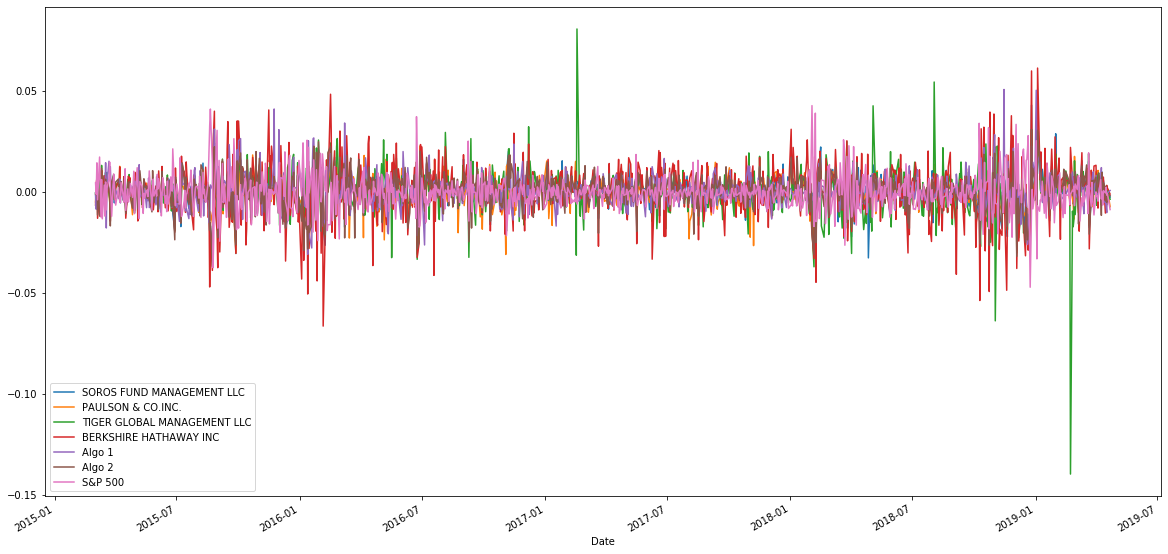

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10))

In [16]:
# Concatnate all cumulative returns
cumulative_df = pd.concat([whale_return_df, algo_return_df,sp500_history_df], axis='columns', join='inner')

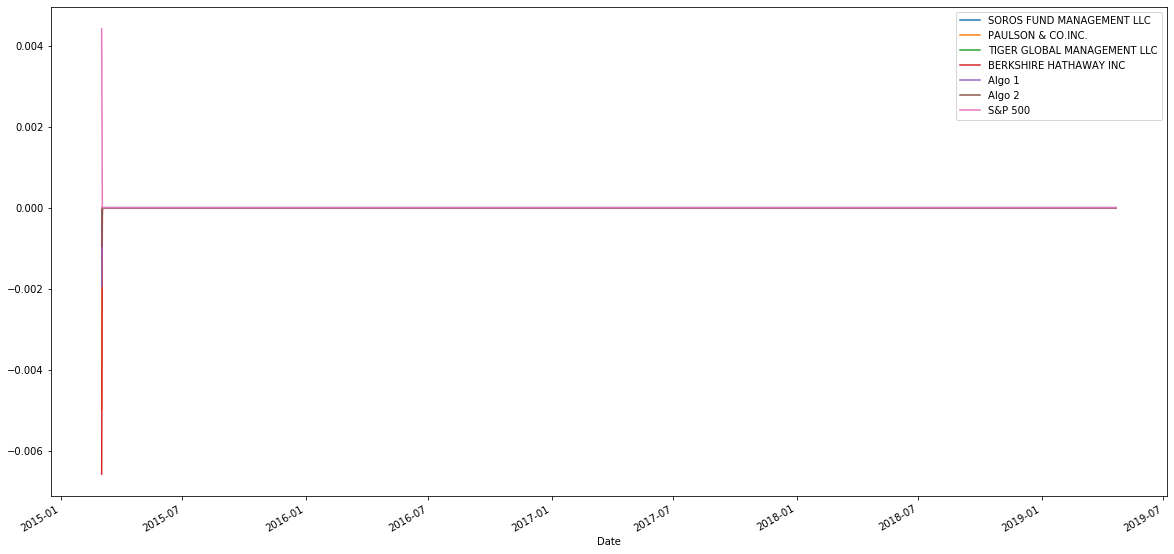

In [21]:
# Plot cumulative returns
cumulative_df  = combined_df.cumprod()
# YOUR CODE HERE
cumulative_df.plot(kind='line', figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

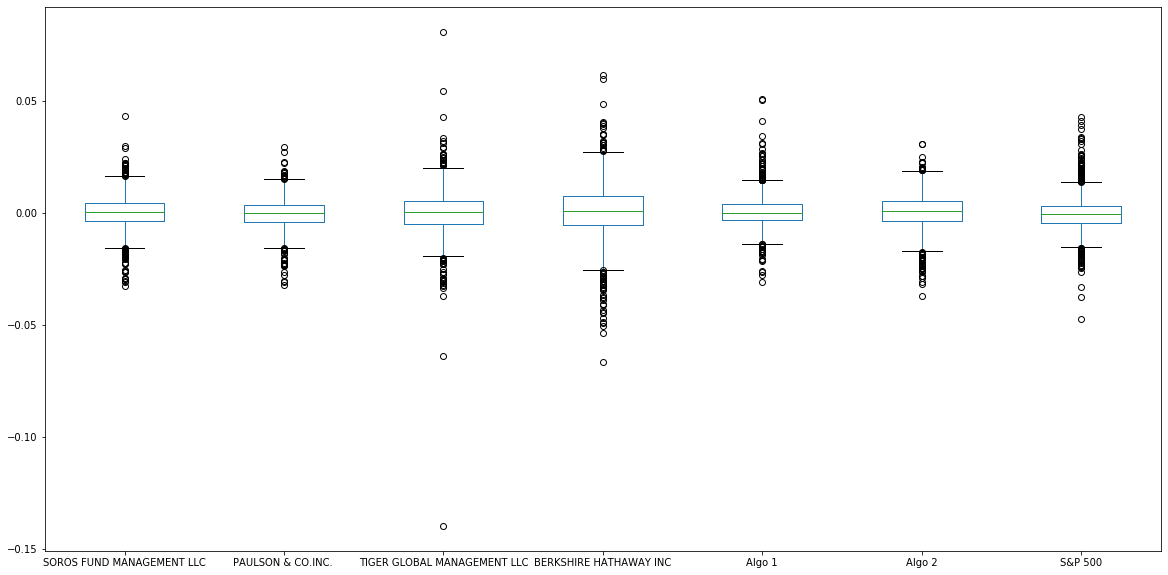

In [22]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot(kind='box', figsize=(20,10))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std = daily_std.sort_values(ascending=False)

daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

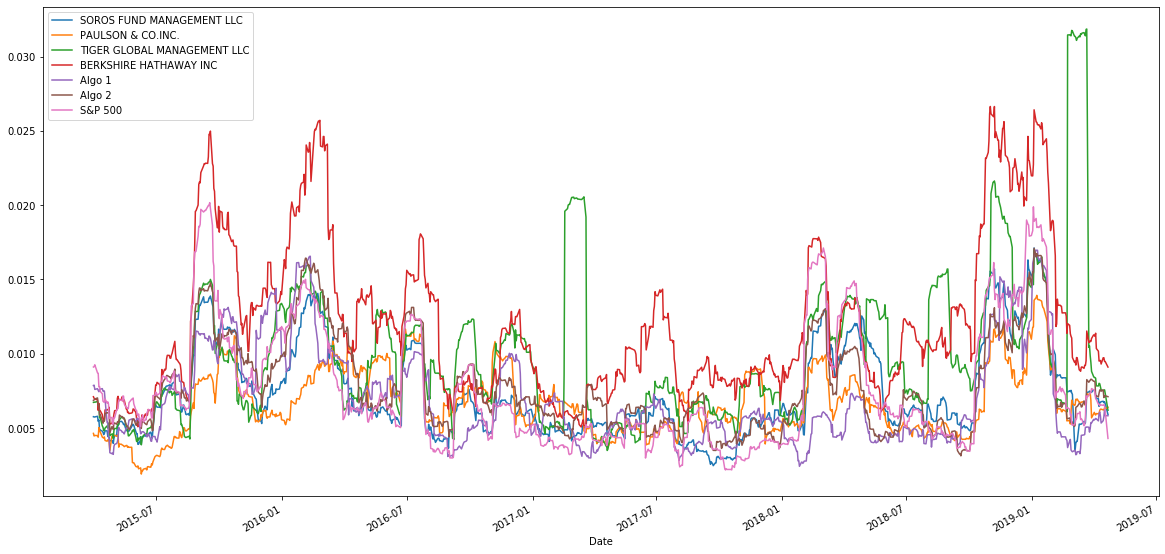

In [25]:

# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10))

In [26]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [27]:
# Calculate covariance of Bershire
berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_df['S&P 500'])
# variance of the total market
variance = combined_df['S&P 500'].var()
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
beta = berkshire_covariance / variance

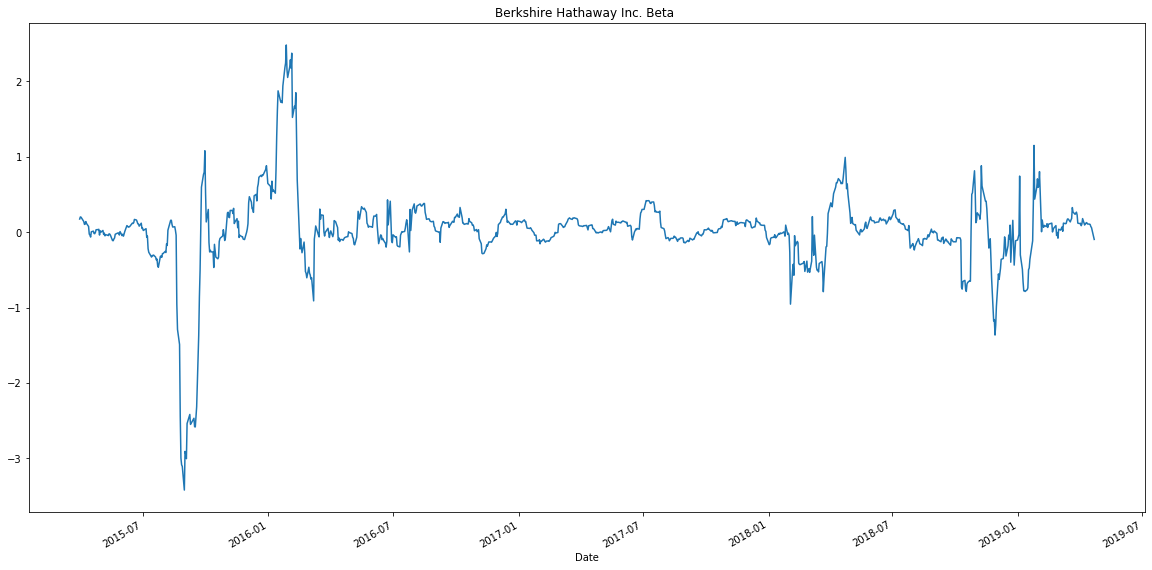

In [28]:
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta ')
                          

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

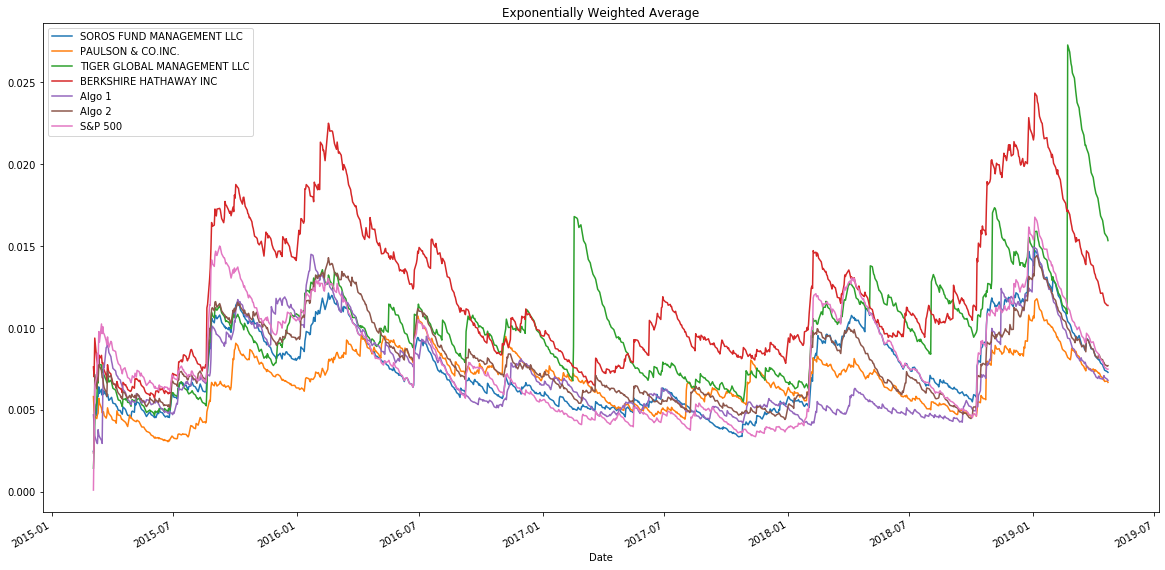

In [25]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [29]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

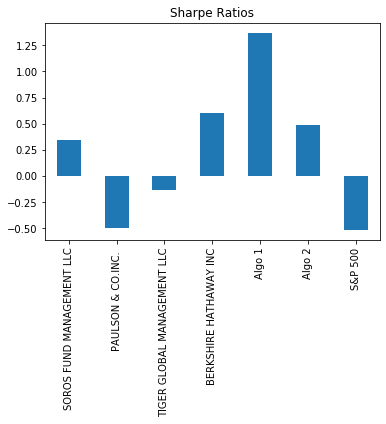

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading Goldman Sachs
goldman_sachs_csv = Path("Resources/goldman_sachs.csv")
# YOUR CODE HERE
goldman_sachs_csv = pd.read_csv(goldman_sachs_csv, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)
goldman_sachs_csv.head()

,GSCP
Trade Date,
2018-01-02 16:00:00,255.67
2018-01-03 16:00:00,253.29
2018-01-04 16:00:00,256.83
2018-01-05 16:00:00,255.52
2018-01-08 16:00:00,251.81


In [32]:
# Reading Moderna
Moderna_csv = Path("Resources/moderna.csv")
# YOUR CODE HERE
Moderna_csv = pd.read_csv(Moderna_csv, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)
Moderna_csv.head()

,MRNACP
Trade Date,
2018-12-07 16:00:00,18.60
2018-12-10 16:00:00,18.80
2018-12-11 16:00:00,18.01
2018-12-12 16:00:00,18.68
2018-12-13 16:00:00,18.76


In [33]:
# Reading Sea Limited
sea_limited_csv = Path("Resources/sea_limited.csv")
# YOUR CODE HERE
sea_limited_csv = pd.read_csv(sea_limited_csv, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)
sea_limited_csv.head()

,SESP
Trade Date,
2018-01-02 16:00:00,13.01
2018-01-03 16:00:00,13.50
2018-01-04 16:00:00,13.00
2018-01-05 16:00:00,13.89
2018-01-08 16:00:00,13.87


In [34]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
personal_df = pd.concat([goldman_sachs_csv, Moderna_csv, sea_limited_csv], axis='columns', join='inner')
personal_df.head()

,GSCP,MRNACP,SESP
Trade Date,,,
2018-12-07 16:00:00,179.67,18.60,12.10
2018-12-10 16:00:00,178.83,18.80,11.81
2018-12-11 16:00:00,176.80,18.01,12.00
2018-12-12 16:00:00,176.70,18.68,12.23
2018-12-13 16:00:00,175.92,18.76,12.16


In [35]:
# Reset the index
# YOUR CODE HERE
personal_df.reset_index()

,Trade Date,GSCP,MRNACP,SESP
0,2018-12-07 16:00:00,179.67,18.60,12.10
1,2018-12-10 16:00:00,178.83,18.80,11.81
2,2018-12-11 16:00:00,176.80,18.01,12.00
3,2018-12-12 16:00:00,176.70,18.68,12.23
4,2018-12-13 16:00:00,175.92,18.76,12.16
5,2018-12-14 16:00:00,172.77,18.32,11.87
6,2018-12-17 16:00:00,168.01,17.00,11.71
7,2018-12-18 16:00:00,171.50,17.00,11.66
8,2018-12-19 16:00:00,169.25,16.18,11.41
9,2018-12-20 16:00:00,168.41,15.50,10.99


In [36]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
personal_df.columns = ['GS', 'MRNA', 'SE']
personal_df

,GS,MRNA,SE
Trade Date,,,
2018-12-07 16:00:00,179.67,18.60,12.10
2018-12-10 16:00:00,178.83,18.80,11.81
2018-12-11 16:00:00,176.80,18.01,12.00
2018-12-12 16:00:00,176.70,18.68,12.23
2018-12-13 16:00:00,175.92,18.76,12.16
2018-12-14 16:00:00,172.77,18.32,11.87
2018-12-17 16:00:00,168.01,17.00,11.71
2018-12-18 16:00:00,171.50,17.00,11.66
2018-12-19 16:00:00,169.25,16.18,11.41


In [37]:
# Drop Nulls
# YOUR CODE HERE
personal_df.dropna(inplace=True)
personal_df.head()

,GS,MRNA,SE
Trade Date,,,
2018-12-07 16:00:00,179.67,18.60,12.10
2018-12-10 16:00:00,178.83,18.80,11.81
2018-12-11 16:00:00,176.80,18.01,12.00
2018-12-12 16:00:00,176.70,18.68,12.23
2018-12-13 16:00:00,175.92,18.76,12.16


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_return = personal_df.pct_change()[1:]
daily_return.head
print(sum(weights))
weighted_returns = (weights*daily_return)
weighted_returns.head
# Plot cumulative returns
#cumulative_returns = personal_df.cumprod(weights)
# YOUR CODE HERE
#cumlative_returns

1.0


<bound method NDFrame.head of                            GS      MRNA        SE
Trade Date                                       
2018-12-10 16:00:00 -0.001558  0.003584 -0.007989
2018-12-11 16:00:00 -0.003784 -0.014007  0.005363
2018-12-12 16:00:00 -0.000189  0.012401  0.006389
2018-12-13 16:00:00 -0.001471  0.001428 -0.001908
2018-12-14 16:00:00 -0.005969 -0.007818 -0.007950
2018-12-17 16:00:00 -0.009184 -0.024017 -0.004493
2018-12-18 16:00:00  0.006924  0.000000 -0.001423
2018-12-19 16:00:00 -0.004373 -0.016078 -0.007147
2018-12-20 16:00:00 -0.001654 -0.014009 -0.012270
2018-12-21 16:00:00 -0.016547 -0.022151 -0.007583
2018-12-24 13:00:00 -0.007706 -0.010136  0.000000
2018-12-26 16:00:00  0.014028 -0.012117  0.020174
2018-12-27 16:00:00  0.005074  0.027860  0.000293
2018-12-28 16:00:00 -0.004796 -0.011377 -0.007310
2018-12-31 16:00:00  0.008219  0.026384  0.005082>

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

all_data = pd.concat([combined_df, weighted_returns], axis='columns', join='outer')
all_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GS,MRNA,SE
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,NaN,NaN,NaN
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,NaN,NaN,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,NaN,NaN,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,NaN,NaN,NaN


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [40]:
# Risk
# YOUR CODE HER
all_data.std(axis=0, skipna=True)


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
GS                             0.007652
MRNA                           0.015944
SE                             0.008190
dtype: float64

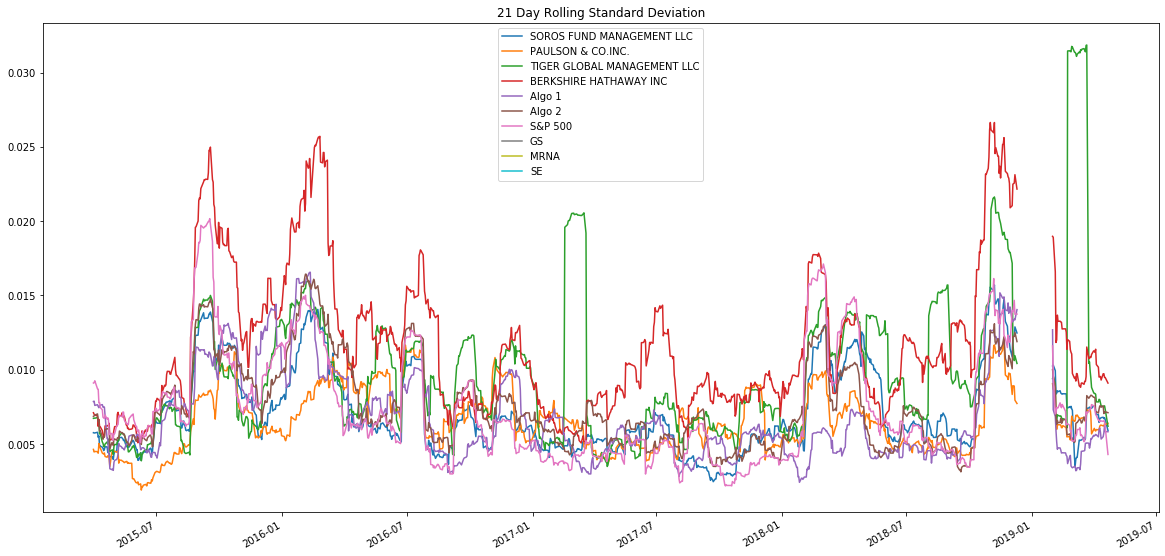

In [43]:
# Rolling
# YOUR CODE HERE
all_data.rolling(window=21).std().plot(title = "21 Day Rolling Standard Deviation", figsize=(20,10))

In [44]:
# Calculate covariance of Goldman Sachs
se_covariance = all_data['SE'].rolling(window=21).cov(all_data['S&P 500'])
# variance of the total market
variance1 = all_data['S&P 500'].var()
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
beta1 = se_covariance / variance1


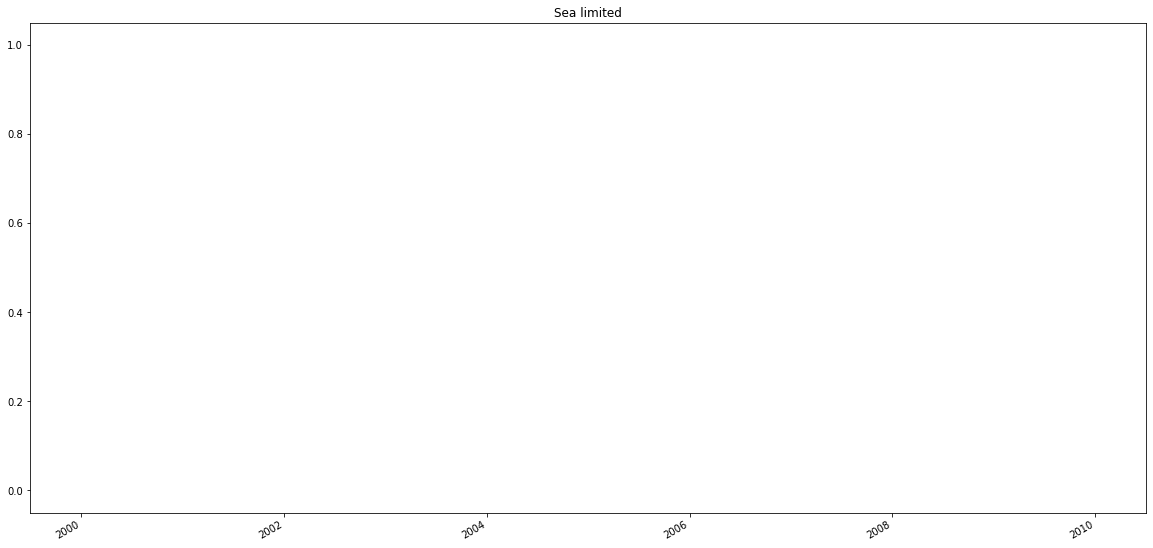

In [45]:
# plot Beta
beta1.plot(figsize=(20, 10), title='Sea limited')

In [46]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (all_data.mean() * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
GS                            -3.178910
MRNA                          -3.986068
SE                            -2.684024
dtype: float64

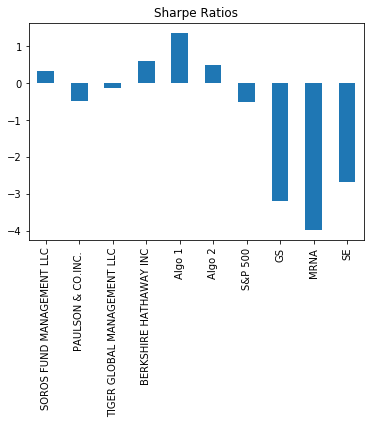

In [47]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [48]:
# YOUR CODE HERE
correlations = all_data.corr()
correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GS,MRNA,SE
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,NaN,NaN,NaN
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,NaN,NaN,NaN
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,NaN,NaN,NaN
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,NaN,NaN,NaN
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,NaN,NaN,NaN
GS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.584916,0.660031
MRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584916,1.000000,0.270956
SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660031,0.270956,1.000000


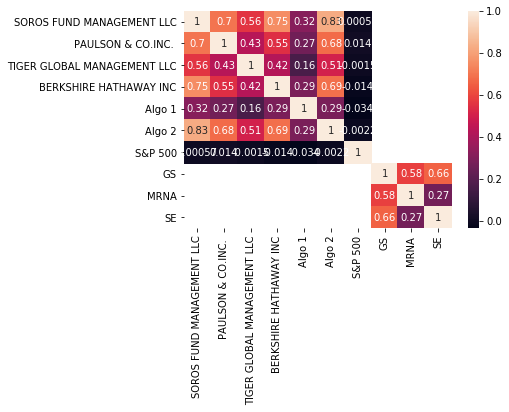

In [51]:

# plot correlation 

sns.heatmap(correlations, annot=True)

### Analysis 